<h1><center>Finding the Best Predictor of a Win in League of Legends</center></h1>
<center>By Kevin Yang</center>

<center><img src="https://s3-eu-central-1.amazonaws.com/www-staging.esports.com/WP%20Media%20Folder%20-%20esports-com//var/app/current/web/app/uploads/2021/02/Riot-Games-League-of-legends-beginners-guide.jpg"/></center>

<h2><center>Introduction</center></h2>
League of Legends is a Multiplayer Online Battle Arena (MOBA) game created by Riot Games in 2009. With over 150 million registered users and 125 million active monthly players. The game takes place on the Summoner's Rift, where 2 teams of 5 go head to head in an attempt to destroy the enemy's nexus. The battle takes place across 3 lanes and the jungle between them. A team typically has 1 dedicated top laner, 1 dedicated mid laner, 1 dedicated jungler, and 2 people in the bottom lane consisting of one "carry" and their support. In order to reach the nexus, a team must destroy at least the 3 towers of a lane, the inhibitor of that lane, and finally the 2 towers that defend the nexus. The game ends when one team manages to destroy the other's nexus. In this tutorial, my goal is to figure out what variables best determine a win in a game of League of Legends. I will be looking at the highest level of gameplay: competitive, where nationally-recognized teams face each other in various leagues across the world. These high-level teams are less likely to make poor plays and decisions, and more likely to transition any advantages into a victory. For this analysis, I will specifically be looking at the 2020 competitive league data which can be found in csv form on <ins>https://www.kaggle.com/datasets/fernandorubiogarcia/2020-league-of-legends-competitive-games?resource=download</ins>.

In [1]:
import pandas as pd

df = pd.read_csv("08_19_2020.csv", sep =";")
df.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,03/01/2020 7:33,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,03/01/2020 9:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,03/01/2020 10:05,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,03/01/2020 10:57,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,04/01/2020 5:33,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0


<h2><center>What Does the Data Mean?</center></h2>
The data set contains a lot of information, most of which is unnecessary. Some of the most important information available within the dataset and what I will be looking at are:
<ul>
    <li>Result - contains the final result of the game with 0 being a loss and 1 being a win
    <li>Both teams contain 5 players, and the data is formatted such that the same player number corresponds to the same role in the team with</li>
    <ul>
        <li>p1 = Support</li>
        <li>p2 = Bot lane carry</li>
        <li>p3 = Mid</li>
        <li>p4 = Jungle</li>
        <li>p5 = Top</li>
    </ul>
    <li>Total gold - this is the gold accumulated over the game, either earned passively over time or actively by killing enemies or destroying objectives</li>
    <li>Dragons taken - number of dragons slain by each team. Each provides a buff to the team that takes it. There are 4 elemental dragons that each give different buffs, but for simplicity's sake and to allow for easier comparison, I will consider them all to be about equal and only consider number of dragons taken, not which ones.</li>
    <li>Barons taken - number of times Baron Nashor was slain by each team. Slaying Baron Nashor provides a temporary buff to the team that provides extra stats and also empowers nearby minions</li>
    <li>Heralds taken - number of Rift Heralds slain by each team. Unlike the other 2, Rift Herald does not provide a buff other than a faster recall. However, it can be summoned to help the team destroy turrets faster.</li>
</ul>

<h2><center>Data Processing</center></h2>
A lot of the data is currently stored for each team. However, we can combine that information to make for easier comparisons. For example, instead of having 2 separate entries for number of dragons slain by each team, we could instead have a single column looking at the difference in the number of dragons slain between the teams. Often, kill participation is reduced to a single statistic: KDA, which stands for kills, deaths, and assists. This is commonly used as a quantifier for how much impact each player had on the game, as kills and assists both give a player gold while deaths mean that they gave gold to the enemy team. Because this statistic is a ratio, having a game with 0 deaths would technically generate an infinite KDA as you would be dividing by 0. I choose to avoid this by incrementing the number of deaths by 1 to make it impossible to divide by 0. Having a better KDA usually indicates being stronger than the opponent, since you've gotten more gold from kills/assists and spent less time dead, signifying more time to gain gold actively. 

In [2]:
#junglediff = df[["t1_result", "t1p4_gold", "t2p4_gold"]]

df["sup_gold_dif"] = df["t1p1_totalgold"] - df["t2p1_totalgold"]
df["bot_gold_dif"] = df["t1p2_totalgold"] - df["t2p2_totalgold"]
df["mid_gold_dif"] = df["t1p3_totalgold"] - df["t2p3_totalgold"]
df["jng_gold_dif"] = df["t1p4_totalgold"] - df["t2p4_totalgold"]
df["top_gold_dif"] = df["t1p5_totalgold"] - df["t2p5_totalgold"]
df["dragon_dif"] = df["t1_dragons"] - df["t2_dragons"]
df["baron_dif"] = df["t1_barons"] - df["t2_barons"]
df["herald_dif"] = df["t1_heralds"] - df["t2_heralds"]

df["t1_sup_deaths"] = df["t1p1_deaths"] + 1
df["t1_bot_deaths"] = df["t1p2_deaths"] + 1
df["t1_mid_deaths"] = df["t1p3_deaths"] + 1
df["t1_jng_deaths"] = df["t1p4_deaths"] + 1
df["t1_top_deaths"] = df["t1p5_deaths"] + 1
df["t2_sup_deaths"] = df["t2p1_deaths"] + 1
df["t2_bot_deaths"] = df["t2p2_deaths"] + 1
df["t2_mid_deaths"] = df["t2p3_deaths"] + 1
df["t2_jng_deaths"] = df["t2p4_deaths"] + 1
df["t2_top_deaths"] = df["t2p5_deaths"] + 1
#calculate kda by taking (kills + assists) / deaths
df["t1_sup_kda"] = (df["t1p1_kills"] + df["t1p1_assists"]) / df["t1_sup_deaths"]
df["t2_sup_kda"] = (df["t2p1_kills"] + df["t2p1_assists"]) / df["t2_sup_deaths"]
df["t1_bot_kda"] = (df["t1p2_kills"] + df["t1p2_assists"]) / df["t1_bot_deaths"]
df["t2_bot_kda"] = (df["t2p2_kills"] + df["t2p2_assists"]) / df["t2_bot_deaths"]
df["t1_mid_kda"] = (df["t1p3_kills"] + df["t1p3_assists"]) / df["t1_mid_deaths"]
df["t2_mid_kda"] = (df["t2p3_kills"] + df["t2p3_assists"]) / df["t2_mid_deaths"]
df["t1_jng_kda"] = (df["t1p4_kills"] + df["t1p4_assists"]) / df["t1_jng_deaths"]
df["t2_jng_kda"] = (df["t2p4_kills"] + df["t2p4_assists"]) / df["t2_jng_deaths"]
df["t1_top_kda"] = (df["t1p5_kills"] + df["t1p5_assists"]) / df["t1_top_deaths"]
df["t2_top_kda"] = (df["t2p5_kills"] + df["t2p5_assists"]) / df["t2_top_deaths"]

df = df[["t1_result", "sup_gold_dif","bot_gold_dif","mid_gold_dif","jng_gold_dif","top_gold_dif","t1_sup_kda","t1_bot_kda","t1_mid_kda","t1_jng_kda","t1_top_kda",
          "t2_sup_kda","t2_bot_kda","t2_mid_kda","t2_jng_kda","t2_top_kda","dragon_dif","baron_dif","herald_dif"]]
df.head()
#aggregate columns for each team (kills, deaths, assists, gold)
#can feed a 0/1 loss function with several factors from each team

,t1_result,sup_gold_dif,bot_gold_dif,mid_gold_dif,jng_gold_dif,top_gold_dif,t1_sup_kda,t1_bot_kda,t1_mid_kda,t1_jng_kda,t1_top_kda,t2_sup_kda,t2_bot_kda,t2_mid_kda,t2_jng_kda,t2_top_kda,dragon_dif,baron_dif,herald_dif
0,1,-110,3341,884,2685,-582,0.666667,8.000000,3.333333,13.000000,1.750000,2.500000,2.000000,1.5,1.6,0.80,-1,1,0.0
1,0,-1997,-1999,-3107,-5907,-1711,0.600000,0.600000,1.666667,0.625000,1.000000,5.500000,10.000000,6.5,5.0,6.50,-3,-2,-2.0
2,1,2675,6288,2298,3561,791,7.000000,15.000000,6.000000,4.000000,3.000000,0.285714,0.666667,1.0,0.4,0.75,4,1,2.0
3,0,-1338,-478,-2812,-4374,-5094,0.666667,0.400000,0.750000,0.600000,0.400000,1.666667,5.000000,14.0,11.0,5.00,-1,-2,0.0
4,0,-921,-3213,-867,-1935,-3268,0.500000,0.333333,0.750000,0.166667,0.333333,13.000000,7.000000,12.0,5.0,6.50,-3,-2,1.0


<h2><center>Data Analysis</center></h2>
<h3><center>Gold Lead</center></h3>
We can first look at how well any individual gold lead predicts a win across the 5 roles. For additional simplification, I have assumed that there is no real difference between the sides (red and blue), since the lanes are mirrored on both sides, though the jungle camps are on opposite sides. We can figure out the percentages where role gold differences led to victory by using t1_result, which records if team 1 won or not, and role gold differences as calculated above to determine whether team 1 or team 2's player of that role had a greater amount of gold.

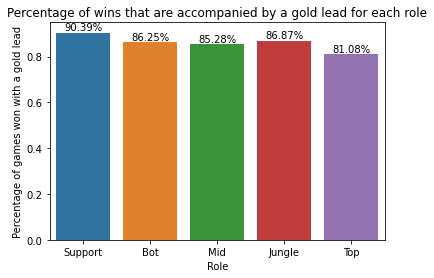

In [3]:
#finds out number of victories for each role where they had a lead in terms of gold
sup_victory = len(df[(df["sup_gold_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["sup_gold_dif"] < 0) & (df["t1_result"] == 0)])
bot_victory = len(df[(df["bot_gold_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["bot_gold_dif"] < 0) & (df["t1_result"] == 0)])
mid_victory = len(df[(df["mid_gold_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["mid_gold_dif"] < 0) & (df["t1_result"] == 0)])
jng_victory = len(df[(df["jng_gold_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["jng_gold_dif"] < 0) & (df["t1_result"] == 0)])
top_victory = len(df[(df["top_gold_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["top_gold_dif"] < 0) & (df["t1_result"] == 0)])
#all games end in one team winning, so can just take length of a column
total_victories = len(df["t1_result"])

import seaborn as sn
import matplotlib.pyplot as plt


ax = sn.barplot(x=["Support","Bot","Mid","Jungle","Top"], y=[sup_victory/total_victories,bot_victory/total_victories,mid_victory/total_victories,jng_victory/total_victories,top_victory/total_victories])
patches = ax.patches
#multiply by 100 to get actual percentages
percentage = [sup_victory/total_victories * 100,bot_victory/total_victories * 100,mid_victory/total_victories * 100,jng_victory/total_victories * 100,top_victory/total_victories * 100]
#add percentage labels to bar graph
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.01
    ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')
plt.title("Percentage of wins that are accompanied by a gold lead for each role")
plt.xlabel("Role")
plt.ylabel("Percentage of games won with a gold lead")
plt.show()

From the above graph, we can see that supports tend to have the highest conversion of a gold lead into a victory at nearly 4% higher than any other lane, but we can also see that a gold lead is a significant indicator of victory in each of the roles. This shows that these competitive players are good at utilizing this advantage and translating it into a win. This gold advantage can come from destroying objectives and minions, but a significant portion usually comes from kills and kill participation, since most players at that level are very good at getting majority of the gold that minions offer. The results can be rationalized due to the fact that support tends to be the role that earns the least amount of gold within the game, as they are mostly concerned with assisting other laners and generally don't take as many kills, meaning that any gold lead on the support will tend to be more significant.
<h3><center>KDA Lead</center></h3>
We can additionally look at the likelihood of winnign due to differences between the KDA ratios for each role across the teams in the same way.

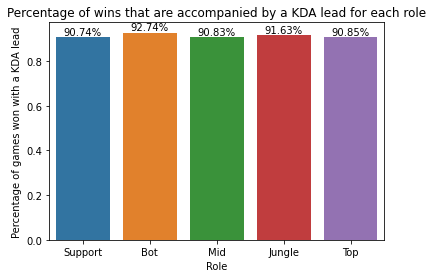

In [4]:
#find differences between the teams
df["sup_kda_dif"] = df["t1_sup_kda"] - df["t2_sup_kda"]
df["bot_kda_dif"] = df["t1_bot_kda"] - df["t2_bot_kda"]
df["mid_kda_dif"] = df["t1_mid_kda"] - df["t2_mid_kda"]
df["jng_kda_dif"] = df["t1_jng_kda"] - df["t2_jng_kda"]
df["top_kda_dif"] = df["t1_top_kda"] - df["t2_top_kda"]

#find number of victories accompanied by a KDA difference in the roles
sup_victory = len(df[(df["sup_kda_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["sup_kda_dif"] < 0) & (df["t1_result"] == 0)])
bot_victory = len(df[(df["bot_kda_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["bot_kda_dif"] < 0) & (df["t1_result"] == 0)])
mid_victory = len(df[(df["mid_kda_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["mid_kda_dif"] < 0) & (df["t1_result"] == 0)])
jng_victory = len(df[(df["jng_kda_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["jng_kda_dif"] < 0) & (df["t1_result"] == 0)])
top_victory = len(df[(df["top_kda_dif"] > 0) & (df["t1_result"] == 1)]) + len(df[(df["top_kda_dif"] < 0) & (df["t1_result"] == 0)])
total_victories = len(df["t1_result"])

ax = sn.barplot(x=["Support","Bot","Mid","Jungle","Top"], y=[sup_victory/total_victories,bot_victory/total_victories,mid_victory/total_victories,jng_victory/total_victories,top_victory/total_victories])
patches = ax.patches
percentage = [sup_victory/total_victories * 100,bot_victory/total_victories * 100,mid_victory/total_victories * 100,jng_victory/total_victories * 100,top_victory/total_victories * 100]
#add percentage labels to bar graph
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.01
    ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')
plt.title("Percentage of wins that are accompanied by a KDA lead for each role")
plt.xlabel("Role")
plt.ylabel("Percentage of games won with a KDA lead")
plt.show()

These results show that KDA differences seem to be a better predictor of victory, as overall win percentages are higher with a positive KDA in relation to the opposing player on the enemy team. Interestingly, a KDA lead is translated into a win for the bottom lane carry the most, narrowly beating out the jungler. This is likely due to the bottom lane carry's niche within the team. The niche for each team is as follows:
<ul>
    <li>Support - primarily tasked with keeping the bottom lane carry alive by either healing/shielding them or by applying debuffs to the enemy team in order to stop them from killing the carry</li>
    <li>Bot lane carry - often the "glass cannon" of the team, bot lane carries provide high, consistent damage at the cost of low health and/or mobility</li>
    <li>Mid - typically mages or assassins, mid laners usually deal high damage all at once, but need to wait on cooldowns before they can do so again. Additionally, due to their presence in the middle of the map, they often help their other laners/junglers to secure kills and objectives</li>
    <li>Jungle - junglers roam around the map helping their laners and securing objectives. Being the only role with the Smite summoner spell, they are tasked with slaying the neutral monsters like dragons, Rift Herald, and Baron Nashor</li>
    <li>Top - often the tank of the team, top laners are often engagers of team fights or serve to draw pressure from the rest of the map by pushing down lanes.</li>
</ul>
Due to their role as the highest DPS (damage per second) of the team, a better KDA signifies more involvement and more damage output in team fights, thus leading to higher rates of victory. For a more detailed explanation of the map and lanes of Summoner's Rift, check out https://theglobalgaming.com/lol/lanes.
<center><img src="https://global-uploads.webflow.com/60f066754425cb9b4fc5881e/623218ffbcf4107ac6356ae1_f0o2LLkw_Gx-QbVneb1oUtg77a3SQuR0192HDd9VGp2ggmjfcPIfhHRD1KLDrxc4IMOmLxYpqFgUKFgY1bVgZ4jHgSrYcxQ40v7QTNoUN6AZq8XvSIEDXGBfQNA97A-hY1qJov0o.jpeg"/></center>

<h3><center>Machine Learning</center></h3>
The first model I will use is a regression using ordinary least squares, as it can still model binary variables (in this case a win or a loss will be the target prediction, either a 0 or a 1) and is a quick and easy analysis to do. This can be done with the data set by splitting it up into a training set, which the model will learn from, and a testing set, which will see how accurately the model can predict the outcome of matches. In order to reduce the number of variables necessary to input into the models, I chose to combine each of the laners' gold and KDA differences and get the average team gold and team KDA difference.

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#generate gold and kda differences across the team, rather than for individual roles
df["gold_dif"] = df[["sup_gold_dif","bot_gold_dif","mid_gold_dif","jng_gold_dif","top_gold_dif"]].mean(axis=1)
df["kda_dif"] = df[["sup_kda_dif","bot_kda_dif","mid_kda_dif","jng_kda_dif","top_kda_dif"]].mean(axis=1)

#splits data into training and test sets
df_train, df_test = train_test_split(df, train_size=0.5)

x_train = df_train.dropna()[["gold_dif","kda_dif","dragon_dif","baron_dif","herald_dif"]].values
y_train = df_train.dropna()["t1_result"].values
x_test = df_test.dropna()[["gold_dif","kda_dif","dragon_dif","baron_dif","herald_dif"]].values
y_test = df_test.dropna()["t1_result"].values
lin_model = sm.OLS(y_train, x_train)
results = lin_model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              473.6
Date:                Mon, 16 May 2022   Prob (F-statistic):                        0.00
Time:                        15:23:27   Log-Likelihood:                         -1938.2
No. Observations:                2507   AIC:                                      3886.
Df Residuals:                    2502   BIC:                                      3916.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


The results from the OLS regression show us that the null hypothesis, that none of the variables input have an impact on the victory of the team, can be rejected due to the very low Prob (F-statistic) which shows a negligible chance that the variables are not statistically significant. This means that at least 1 of gold difference, KDA difference, and/or objective differences is a likely predictor of winning. By observing the p-values of the data, we can see that the regression suggests that only the gold difference and the differences in Rift Heralds slain seems to be of statistical significance. This is quite interesting due to how much importance is placed on KDA, Baron, and dragons. Both dragon and Baron are heavily prioritized in games, with laners often beginning to prepare to fight over them up to a minute before they spawn, which is around every 5 or 6 minutes for dragons and 7 minutes for Baron. Overall, however, the OLS regression does not do a great job of predicting the results with an r^2 value of just around 0.49, so we can instead look at a supervised machine learning algorithm that can better classify results: K-nearest neighbors. We can do this is the same fashion as the OLS regression with the same test and training sets. Because of the results above, I chose to double check Herald and gold differences to see if they remain significant under the new classifier, as well as looking at objectives as a whole. Then, I looked at how well a K-neighbors classifier could predict wins or losses based on all of those together to see if I could make it more accurate with more interaction variables.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

#model using just Barons as interaction variable
model4 = KNeighborsClassifier()
x_train_herald = df_train.dropna()["herald_dif"].values.reshape(-1,1)
y_train_herald = df_train.dropna()["t1_result"].values
x_test_herald = df_test.dropna()[["herald_dif"]].values.reshape(-1,1)
y_test_herald = df_test.dropna()["t1_result"].values
model4.fit(x_train_herald,y_train_herald)
y_test_herald_pred = model4.predict(x_test_herald)
print("r^2 value of the Rift Herald model: ", r2_score(y_test_herald, y_test_herald_pred))

#model using objectives as interaction variables
model3 = KNeighborsClassifier()
x_train_obj = df_train.dropna()[["dragon_dif","baron_dif","herald_dif"]].values
y_train_obj = df_train.dropna()["t1_result"].values
x_test_obj = df_test.dropna()[["dragon_dif","baron_dif","herald_dif"]].values
y_test_obj = df_test.dropna()["t1_result"].values
model3.fit(x_train_obj,y_train_obj)
y_test_obj_pred = model3.predict(x_test_obj)
print("r^2 value of the objectives model: ", r2_score(y_test_obj, y_test_obj_pred))

#model using gold as interaction variable
model2 = KNeighborsClassifier()
x_train_gold = df_train.dropna()["gold_dif"].values.reshape(-1,1)
y_train_gold = df_train.dropna()["t1_result"].values
x_test_gold = df_test.dropna()[["gold_dif"]].values.reshape(-1,1)
y_test_gold = df_test.dropna()["t1_result"].values
model2.fit(x_train_gold,y_train_gold)
y_test_gold_pred = model2.predict(x_test_gold)
print("r^2 value of the gold model: ", r2_score(y_test_gold, y_test_gold_pred))
print(classification_report(y_test_gold, y_test_gold_pred))

#model using gold, KDA, and objectives as interaction variables as used in the OLS regression above
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
print("r^2 value of the multi-variable model: ", r2_score(y_test, y_test_pred))


print(classification_report(y_test, y_test_pred))

model5 = KNeighborsClassifier()
x_train_gold_sup = df_train.dropna()["sup_gold_dif"].values.reshape(-1,1)
y_train_gold_sup = df_train.dropna()["t1_result"].values
x_test_gold_sup = df_test.dropna()[["sup_gold_dif"]].values.reshape(-1,1)
y_test_gold_sup = df_test.dropna()["t1_result"].values
model5.fit(x_train_gold_sup,y_train_gold_sup)
y_test_gold_sup_pred = model5.predict(x_test_gold_sup)
print("r^2 value of the support gold model: ", r2_score(y_test_gold_sup, y_test_gold_sup_pred))

r^2 value of the Rift Herald model:  -0.510751882814517
r^2 value of the objectives model:  0.5459750955351081
r^2 value of the gold model:  0.9360528303570574
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.99      0.98      0.98      1315

    accuracy                           0.98      2508
   macro avg       0.98      0.98      0.98      2508
weighted avg       0.98      0.98      0.98      2508

r^2 value of the multi-variable model:  0.937651509598131
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.99      0.98      0.99      1315

    accuracy                           0.98      2508
   macro avg       0.98      0.98      0.98      2508
weighted avg       0.98      0.98      0.98      2508

r^2 value of the support gold model:  0.6323037745530805


Contrary to the OLS regression model, the K-nearest neighbors model found Rift Heralds to be a fairly weak predictor, and even then, it appears more to weakly predict a loss. This is quite interesting because there iss no real downside to taking Rift Herald unless  Next, I looked at the differences between all of the large neutral monster objectives, which served as a much better predictor of victory, at around 0.71 for its r^2 value. Then, I looked once again at the total gold difference, which had a very strong predictive power with an r^2 of above 0.93. Finally, I looked at them all together, including teamwide KDA differences, and found that even with 4 more variables to work with, it only performed slightly better (or sometimes even just the same) than just looking at the gold lead alone. Looking at the classification report for the aggregated model and the gold model, we observe that it has a very high precision and can predict the outcome fairly well from those key differences, and that there appears to be no significant difference in the predictive power of gold alone or with gold, KDA, and objectives taken into account. In addition, due to support gold differences being most correlated with victory that was observed above, I also chose another model that looked at that as well, though it seems to be a fairly weak predictor on its own, being outcompeted by the objectives model classifier.
<h3><center>Conclusions</center></h3>
Though I didn't look at all of the data in the table, which also included things like statistics at 10 and 15 minutes, damage to champions, inhibitors destroyed, etc., I found that gold differences alone can predict the outcome of a game quite well in professional play, and can correctly do so around 98-99% of the time. However, League of Legends is a dynamic games featuring many little variables that can all impact the outcome, so I don't think that we can realistically reach 100% precision. At a certain point, gold differences will no longer matter as everyone finishes buying everything that they need, though professional games usually will end before it gets to that point. Additionally, a single bad decision later on in the game could result in a loss even if the entire team is ahead otherwise. However, I think it really is a testament to these players' level of gameplay and decision-making that a gold lead can be a predictor of a win >98% of the time. These competitive players can make good use of their advantages and rarely throw games, supporting why they are seen as the top players around the world. Overall, the data suggests that establishing a gold lead is crucial to victory. This can be done via participating more in kills, killing more minions and/or monsters, and destroying objectives. More recently, this has been further complicated by the addition of objective bounties to supplement the gold of a team that has fallen behind in gold, but the idea still remains.